# Airbnb Review Analysis

The objective of this project is to develop a deep knowledge of **Airbnb** guests' perspectives and experiences. We want to determine the top 20 keywords for each neighborhood, rating group, and sentiment score by looking at customer feedback and reviews using `Regular Expression` (Regex) package. We will be able to determine the words and phrases that appear most frequently in guest reviews using this method, and we will gain insight into the most typical themes and experiences shared by Airbnb guests. Understanding the elements that have the greatest impact on guest satisfaction will help Airbnb hosts improve the user experience, which may lead to more bookings, better ratings, and a better reputation. Also, by looking at the top keywords for each neighborhood, we can get more insights into the unique features and characteristics of various locations/neighborhoods, which can help hosts customize their amenities to suit the tastes of possible guests.

## Identify Common Topics in Reviews Across Different Ratings

#### Importing Required Library:

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the Compressed CSV File:

In [2]:
#Loading the Data
df = pd.read_csv(r"C:\Users\13152\Desktop\KAJJU\CPP\AIRBNB_project\2021_REVIEWs.csv") #Change the path before reading csv
df= df.drop(columns=['Unnamed: 0'])# drop columns we don't need
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,review,language,trans_text,review_scores_rating,corpus,neg,neu,pos,compound,Year,Month,Day
0,50956526,495694719364871609,2021-11-14,128150420,Alisher,Все супер,mk,Superi,NaN,superi,0.0,1.0,0.0,0.0000,2021,11,14
1,37910108,438438577414505652,2021-08-27,330587755,Judparkaifun,ดี,th,good,4.64,good,0.0,0.0,1.0,0.4404,2021,8,27
2,39749229,491283403172652395,2021-11-08,429825100,Jonathan,replies asap,lv,Replies ASAP,5.00,replies asap,0.0,1.0,0.0,0.0000,2021,11,8
3,49093982,420991488258969127,2021-08-03,258183109,Trieauna,No air 1 tv,lv,From Air 1 TV,4.67,air tv,0.0,1.0,0.0,0.0000,2021,8,3
4,48347594,399280345007766799,2021-07-04,134316173,David,Grrrrrrrr-8!!!,sq,GRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRG !!!,4.00,grrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrg,0.0,1.0,0.0,0.0000,2021,7,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256534 entries, 0 to 256533
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   listing_id            256534 non-null  int64  
 1   id                    256534 non-null  int64  
 2   date                  256534 non-null  object 
 3   reviewer_id           256534 non-null  int64  
 4   reviewer_name         256534 non-null  object 
 5   review                256534 non-null  object 
 6   language              256534 non-null  object 
 7   trans_text            256534 non-null  object 
 8   review_scores_rating  233042 non-null  float64
 9   corpus                256423 non-null  object 
 10  neg                   256534 non-null  float64
 11  neu                   256534 non-null  float64
 12  pos                   256534 non-null  float64
 13  compound              256534 non-null  float64
 14  Year                  256534 non-null  int64  
 15  

In [4]:
#Dropping all NA
df.dropna()

,listing_id,id,date,reviewer_id,reviewer_name,review,language,trans_text,review_scores_rating,corpus,neg,neu,pos,compound,Year,Month,Day
1,37910108,438438577414505652,2021-08-27,330587755,Judparkaifun,ดี,th,good,4.64,good,0.000,0.000,1.000,0.4404,2021,8,27
2,39749229,491283403172652395,2021-11-08,429825100,Jonathan,replies asap,lv,Replies ASAP,5.00,replies asap,0.000,1.000,0.000,0.0000,2021,11,8
3,49093982,420991488258969127,2021-08-03,258183109,Trieauna,No air 1 tv,lv,From Air 1 TV,4.67,air tv,0.000,1.000,0.000,0.0000,2021,8,3
4,48347594,399280345007766799,2021-07-04,134316173,David,Grrrrrrrr-8!!!,sq,GRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRG !!!,4.00,grrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrg,0.000,1.000,0.000,0.0000,2021,7,4
5,49017437,428983165747083451,2021-08-14,399555571,Md Gulam,like it,sq,like,4.57,like,0.000,0.000,1.000,0.3612,2021,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256529,50657919,395694710449210846,2021-06-29,88534834,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,"Wonderful location, seamless check-in, great v...",en,"Wonderful location, seamless check-in, great v...",5.00,wonderful location seamless checkin great valu...,0.000,0.678,0.322,0.9606,2021,6,29
256530,50658212,395626095400592939,2021-06-29,46982602,Nichole,Location is amazing but the house itself was a...,en,Location is amazing but the house itself was a...,5.00,location amazing house amazing like living pag...,0.000,0.458,0.542,0.9700,2021,6,29
256531,50658212,396376366194212344,2021-06-30,245354252,Margo,Lovely home. So beautifully designed and the m...,en,Lovely home. So beautifully designed and the m...,5.00,lovely home beautifully designed amazing host ...,0.137,0.196,0.667,0.8957,2021,6,30
256532,50664966,394885968992568537,2021-06-28,174445626,Justin,Cheng is the best and his place is amazing! Ve...,en,Cheng is the best and his place is amazing! Ve...,5.00,cheng best place amazing clean peaceful everyt...,0.000,0.315,0.685,0.9618,2021,6,28


In [5]:
df['corpus'].isna().sum()

111

In [6]:
df = df.dropna(subset=['corpus'])
df.isna().sum()

listing_id                  0
id                          0
date                        0
reviewer_id                 0
reviewer_name               0
review                      0
language                    0
trans_text                  0
review_scores_rating    23472
corpus                      0
neg                         0
neu                         0
pos                         0
compound                    0
Year                        0
Month                       0
Day                         0
dtype: int64

### Descriptive Statistics

In [7]:
df.describe()

,listing_id,id,reviewer_id,review_scores_rating,neg,neu,pos,compound,Year,Month,Day
count,2.564230e+05,2.564230e+05,2.564230e+05,232951.000000,256423.000000,256423.000000,256423.000000,256423.000000,256423.0,256423.000000,256423.000000
mean,3.247336e+07,2.652289e+17,1.843191e+08,4.806136,0.019064,0.461269,0.519468,0.794138,2021.0,6.712959,15.685609
std,1.514533e+07,2.220303e+17,1.395977e+08,0.249920,0.055280,0.183083,0.197084,0.261081,0.0,2.980999,8.916464
min,2.708000e+03,7.203124e+08,2.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.995200,2021.0,1.000000,1.000000
25%,2.092124e+07,7.526975e+08,5.501667e+07,4.750000,0.000000,0.334000,0.393000,0.743000,2021.0,4.000000,8.000000
50%,3.618102e+07,4.058428e+17,1.584498e+08,4.880000,0.000000,0.463000,0.522000,0.891000,2021.0,7.000000,16.000000
75%,4.576942e+07,4.586934e+17,3.218619e+08,4.950000,0.000000,0.581000,0.658000,0.951700,2021.0,9.000000,23.000000
max,5.366602e+07,5.123978e+17,4.344658e+08,5.000000,1.000000,1.000000,1.000000,0.999600,2021.0,12.000000,31.000000


In [10]:
df[['review_scores_rating','compound']].describe()

,review_scores_rating,compound
count,232951.000000,256423.000000
mean,4.806136,0.794138
std,0.249920,0.261081
min,0.000000,-0.995200
25%,4.750000,0.743000
50%,4.880000,0.891000
75%,4.950000,0.951700
max,5.000000,0.999600


The analysis compares two columns, `review_scores_rating` and `compound`, within the DataFrame. 

In the `review_scores_rating` column, there are 232,951 valid values with an average rating of around 4.806, indicating the general satisfaction level. The ratings show relatively low variability, with a standard deviation of 0.249, suggesting consistent scores. The range spans from a minimum of 0.000 (likely indicating missing ratings) to a maximum of 5.000 (a perfect score). The 25th, 50th (median), and 75th percentile ratings are 4.750, 4.880, and 4.950, respectively.

Moving to the `compound` column, it contains 256,423 valid values representing sentiment scores. The average 'compound' score is about 0.794, suggesting a positive sentiment trend. There is some variability, as indicated by a standard deviation of 0.261. The range extends from a minimum of -0.995 (possibly indicating negative sentiment) to a maximum of 0.9996 (close to the upper limit of positive sentiment). The 25th, 50th (median), and 75th percentile 'compound' scores are 0.743, 0.891, and 0.9517, respectively. These statistics collectively provide insights into the distribution and characteristics of both review ratings and sentiment scores present in the dataset.

## Creating Rating Buckets

In [11]:
#Defining the Rating Groups Function:
def rating_groups (row):
    if row ['review_scores_rating'] >= 4:
        return '4-5'
    if 3 <= row ['review_scores_rating'] < 4 :
        return '3-4'
    if 2 <= row ['review_scores_rating'] < 3:
        return '2-3'
    if 1 <= row ['review_scores_rating'] < 2:
        return '1-2'
    if 0 <= row ['review_scores_rating'] < 1:
        return '0-1'
    return "NAN"

df['Rating_grouped'] = df.apply(lambda row: rating_groups(row), axis = 1)

In [12]:
df['Rating_grouped'].value_counts()

4-5    231115
NAN     23472
3-4      1479
2-3       191
1-2        99
0-1        67
Name: Rating_grouped, dtype: int64

### Common Keyword Extraction

#### Data Grouping

The code groups the data into different subsets based on the 'Rating_grouped' column, which presumably contains rating buckets such as '4-5', '3-4', '2-3', '1-2', and '0-1'.

In [14]:
# Extracting words for each buckets
r4_5 = df[df['Rating_grouped']== '4-5' ]
r3_4 = df[df['Rating_grouped']== '3-4' ]
r2_3 = df[df['Rating_grouped']== '2-3' ]
r1_2 = df[df['Rating_grouped']== '1-2' ]
r0_1 = df[df['Rating_grouped']== '0-1' ]

r4_5_word_list = []
r3_4_word_list = []
r2_3_word_list = []
r1_2_word_list = []
r0_1_word_list = []

#### Word Extraction and Counting:
For each subset corresponding to a specific rating range, the code splits the 'corpus' (textual data) into words, counts the occurrences of each word using `Counter`, and creates a list of the most common words using the `most_common()` method.

In [13]:
# Extracting words for each buckets
r4_5 = df[df['Rating_grouped']== '4-5' ]
r3_4 = df[df['Rating_grouped']== '3-4' ]
r2_3 = df[df['Rating_grouped']== '2-3' ]
r1_2 = df[df['Rating_grouped']== '1-2' ]
r0_1 = df[df['Rating_grouped']== '0-1' ]

r4_5_word_list = []
r3_4_word_list = []
r2_3_word_list = []
r1_2_word_list = []
r0_1_word_list = []

In [15]:
from itertools import chain
from collections import Counter

In [16]:
# For 4-5 star rating
for i in range(0, r4_5['corpus'].count()):
    r4_5_word_temp = r4_5['corpus'].iloc[i].split()
    r4_5_word_list.append(r4_5_word_temp)
r4_5_list= list(chain.from_iterable(r4_5_word_list))
r4_5_mc = Counter(r4_5_list).most_common()


# For 3-4 star rating
for i in range(0, r3_4['corpus'].count()):
    r3_4_word_temp = r3_4['corpus'].iloc[i].split()
    r3_4_word_list.append(r3_4_word_temp)
r3_4_list= list(chain.from_iterable(r3_4_word_list))
r3_4_mc = Counter(r3_4_list).most_common()


# For 2-3 star rating
for i in range(0, r2_3['corpus'].count()):
    r2_3_word_temp = r2_3['corpus'].iloc[i].split()
    r2_3_word_list.append(r2_3_word_temp)
r2_3_list= list(chain.from_iterable(r2_3_word_list))
r2_3_mc = Counter(r2_3_list).most_common()


# For 1-2 star rating
for i in range(0, r1_2['corpus'].count()):
    r1_2_word_temp = r1_2['corpus'].iloc[i].split()
    r1_2_word_list.append(r1_2_word_temp)
r1_2_list= list(chain.from_iterable(r1_2_word_list))
r1_2_mc = Counter(r1_2_list).most_common()


# For 0-1 star rating
for i in range(0, r0_1['corpus'].count()):
    r0_1_word_temp = r0_1['corpus'].iloc[i].split()
    r0_1_word_list.append(r0_1_word_temp)
r0_1_list= list(chain.from_iterable(r0_1_word_list))
r0_1_mc = Counter(r0_1_list).most_common()

#### Subsetting Most Common Words
The code further subsets these DataFrames to select the top 30 most common words using slicing (`[0:30]`), resulting in DataFrames like `df_4_5r`, `df_3_4r`, etc.

In [17]:
df_4_5 = pd.DataFrame(r4_5_mc)
df_3_4 = pd.DataFrame(r3_4_mc)
df_2_3 = pd.DataFrame(r2_3_mc)
df_1_2 = pd.DataFrame(r1_2_mc)
df_0_1 = pd.DataFrame(r0_1_mc)

#### Subsetting Most Common Words
The code further subsets these DataFrames to select the top 30 most common words using slicing (`[0:30]`), resulting in DataFrames like `df_4_5r`, `df_3_4r`, etc.


In [21]:
df_4_5r = df_4_5[0:30]
df_3_4r = df_3_4[0:30]
df_2_3r = df_2_3[0:30]
df_1_2r = df_1_2[0:30]
df_0_1r = df_0_1[0:30]

#### Common Keyword Extraction
The common keywords that appear in the most common word lists across all rating subsets. It performs set intersections of the most common words in each rating subset DataFrames and stores the result in the `df_common` list.


In [22]:
#extracting common Key words
df_common = list(set(df_4_5r.iloc[:,0]) & set(df_3_4r.iloc[:,0])& set(df_2_3r.iloc[:,0]) 
             & set(df_0_1r.iloc[:,0]) )

In [23]:
df_common

['location',
 'place',
 'nice',
 'really',
 'us',
 'stay',
 'great',
 'house',
 'would',
 'room',
 'clean',
 'host']

In the provided output, the common keywords extracted from the most common word lists across different rating subsets are: 'location', 'place', 'nice', 'really', 'us', 'stay', 'great', 'house', 'would', 'room', 'clean', 'host'. These are words that frequently appear in reviews across different rating groups and likely indicate key aspects that are often mentioned regardless of the rating given.

## Frequent Keywords for (4-5) Rating Group

In [24]:
# Function for changing the color of the text
def one_color_func(word = None, font_size = None,
                   position = None, orientation = None,
                   font_path = None, random_state = None):
   
   # This HSL is for the green color
    h = 7
    s = 100
    l = 65
    return "hsl({}, {}%, {}%)".format(h, s, l)

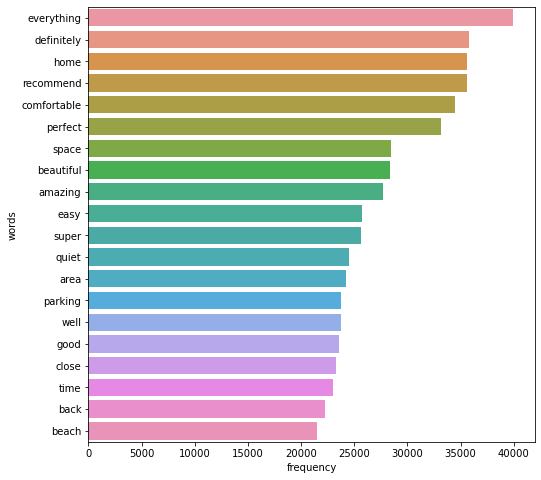

In [26]:
data45 = pd.DataFrame(r4_5_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data45 = data45[~data45['words'].isin(df_common)]
data45 = data45.head(20)
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = 'frequency', y='words', data= data45)

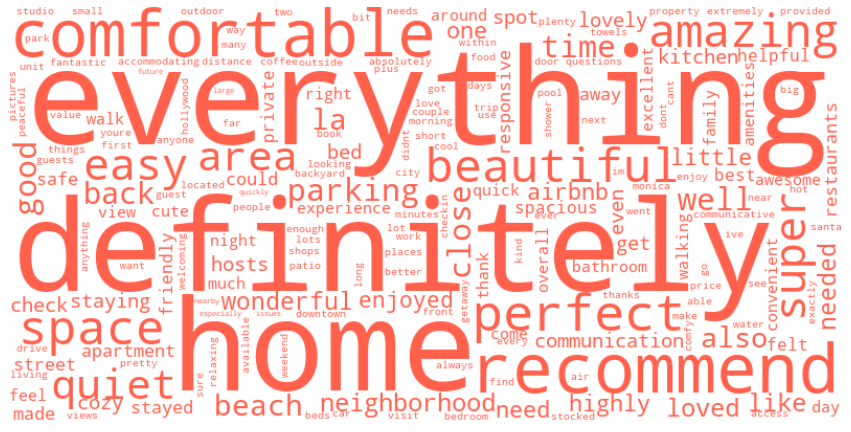

In [60]:
data45 = pd.DataFrame(r4_5_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data45 = data45[~data45['words'].isin(df_common)]
data = data45.set_index('words').to_dict()['frequency']

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200, background_color="white", color_func = one_color_func).generate_from_frequencies(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



The top 20 keywords for the 4-5 rating group are "everything," "definitely," "home," "recommend," "comfortable," "perfect," "space," "beautiful," "amazing," "easy," "super," "quiet," "area," "parking," "well," "good," "close," "time," "back," and "beach." Based on these keywords, we can infer that the majority of the listings in this rating group are comfortable, and the hosts appreciate everything about them, feeling at home. The listings are likely situated near tourist attractions or airports, as evidenced by the words "close" and "beach." Additionally, most of these listings have parking facilities, as "parking" is a frequent keyword. 

## Frequent Keywords for (3-4) Rating Group

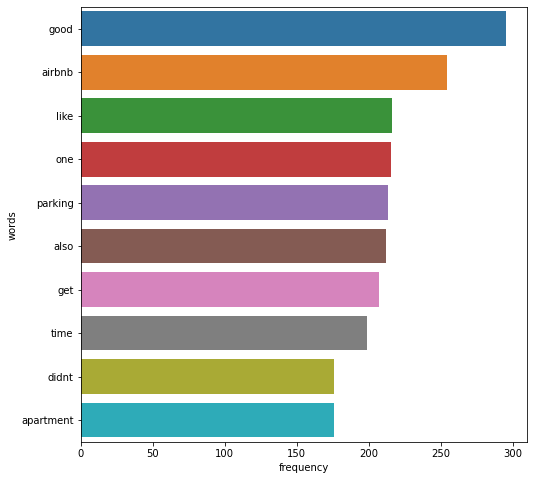

In [61]:
data34 = pd.DataFrame(r3_4_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data34 = data34[~data34['words'].isin(df_common)]
data34 = data34.head(10)
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = 'frequency', y='words', data= data34)

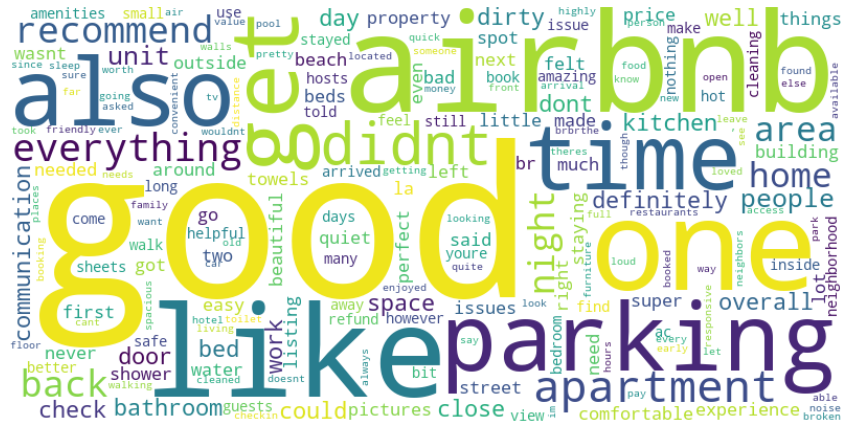

In [43]:
data34 = pd.DataFrame(r3_4_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data34 = data34[~data34['words'].isin(df_common)]

data = data34.set_index('words').to_dict()['frequency']

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



The top 20 keywords for the 3-4 rating group are "good," "Airbnb," "like," "one," "parking," "also," "get," "time," "didn't," "apartment," "everything," "recommended," "back," "night," "home," "area," "people," "unit," "definitely," and "close." These keywords suggest that the listings in this rating group are apartments, and guests generally like them. The keywords are similar to those in the 4-5 rating group, but there may have been something that guests didn't like during their stay, as indicated by the keyword "didn't". 

## Frequent Keywords for (2-3) Rating Group

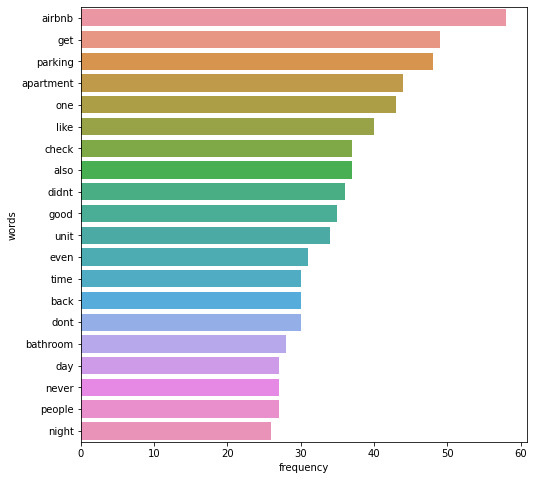

In [44]:
data23 = pd.DataFrame(r2_3_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data23 = data23[~data23['words'].isin(df_common)]
data23 = data23.head(20)
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = 'frequency', y='words', data= data23)

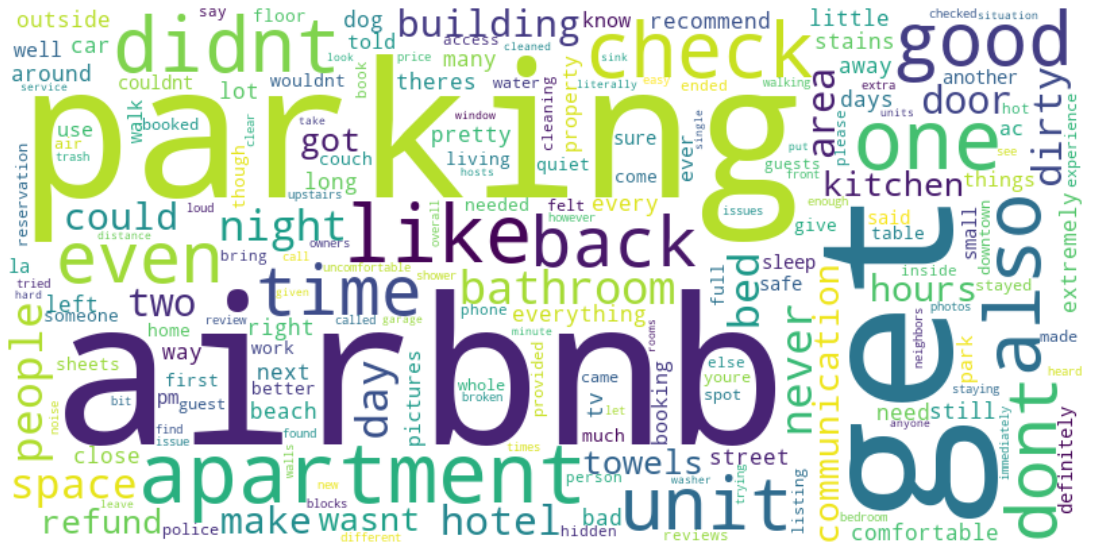

In [46]:
data23 = pd.DataFrame(r2_3_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data23 = data23[~data23['words'].isin(df_common)]

data = data23.set_index('words').to_dict()['frequency']

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

The top 20 keywords for the 2-3 rating group are "Airbnb", "get", "parking", "apartment", "one", "like", "check", "also", "didn't", "good", "unit", "even," "time", "back", "don't", "bathroom", "dat", "never", and "night". There are some negative words in this rating group, such as "didn't", "don't", and "never" which suggest that guests may not have a good experience. 

## Frequent Keywords for (1-2) Rating Group

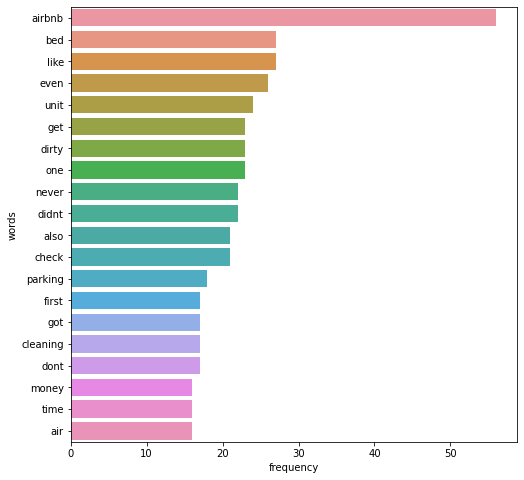

In [31]:
data12 = pd.DataFrame(r1_2_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data12 = data12[~data12['words'].isin(df_common)]
data12 = data12.head(20)
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = 'frequency', y='words', data= data12)

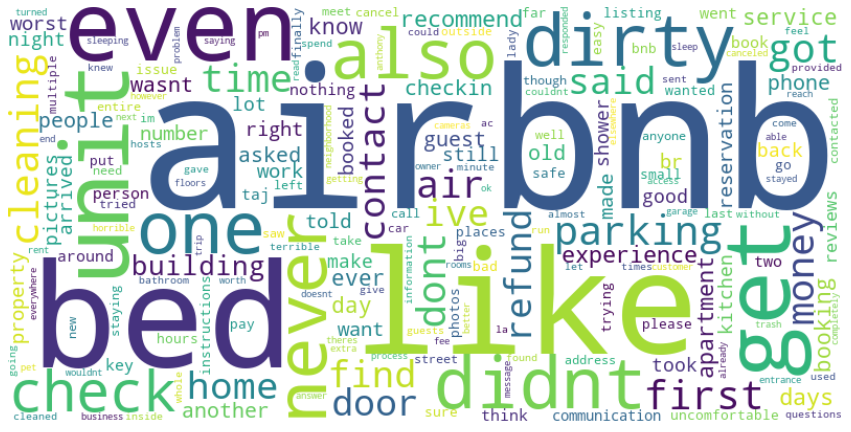

In [47]:
data12 = pd.DataFrame(r1_2_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data12 = data12[~data12['words'].isin(df_common)]

data = data12.set_index('words').to_dict()['frequency']

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The top 20 keywords for the 1-2 rating group are "Airbnb", "bed", "like", "even", "unit", "get", "dirty", "one", "never", "didn't", "also,", "check", "parking", "first", "got", "cleaning", "money", "time", and "air". Most of the listings in this rating group are not very clean and may not be ready for check-in on time, as indicated by keywords like "dirty", "cleaning", and "time". 

## Frequent Keywords for (0-1) Rating Group

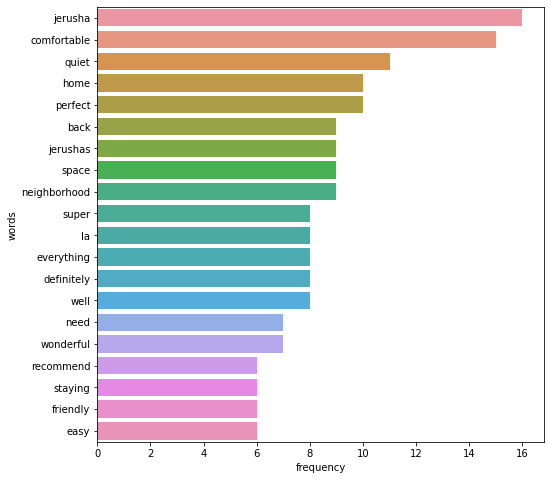

In [33]:
data01 = pd.DataFrame(r0_1_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data01 = data01[~data01['words'].isin(df_common)]
data01 = data01.head(20)
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = 'frequency', y='words', data= data01)

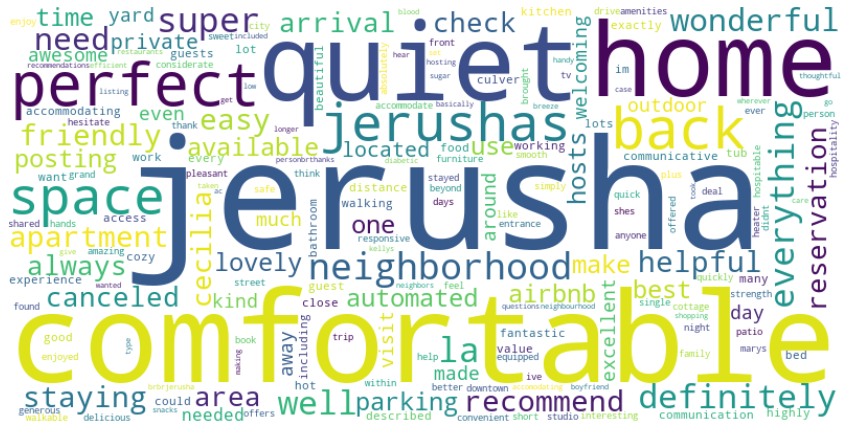

In [48]:
data01 = pd.DataFrame(r0_1_mc, columns=['words','frequency']).sort_values(by = 'frequency', ascending = False)
data01 = data01[~data01['words'].isin(df_common)]

data = data01.set_index('words').to_dict()['frequency']

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Lastly, the top 20 keywords for the 0-1 rating group are "Airbnb", "didn't", "owner", "days", "fix", "time", "booking", "told", "night", "listing", "booked", "reservation", "canceled", "back", "get", "find", "never", "posting", and "automated", which suggest that the host may have canceled the stay, leading the guest to rate the listing poorly.

## Descriptive Statistics of Compound Sentiment Score for each rating group

In [28]:
df_0to1= df[df['Rating_grouped'] == '0-1']
d01 = df_0to1[['compound']].describe()
d01 = d01.T

df_1to2= df[df['Rating_grouped'] == '1-2']
d12 = df_1to2[['compound']].describe()
d12 = d12.T

df_2to3= df[df['Rating_grouped'] == '2-3']
d23 = df_2to3[['compound']].describe()
d23 = d23.T

df_3to4= df[df['Rating_grouped'] == '3-4']
d34 = df_3to4[['compound']].describe()
d34 = d34.T

df_4to5= df[df['Rating_grouped'] == '4-5']
d45=df_4to5[['compound']].describe()
d45= d45.T

result= pd.concat([d01,d12,d23,d34,d45])

rating = ['0-1', '1-2', '2-3', '3-4','4-5']
result.insert(0, 'Rating_group', rating)

In [29]:
result = result.set_index('Rating_group')
result

,count,mean,std,min,25%,50%,75%,max
Rating_group,,,,,,,,
0-1,67.0,0.768576,0.296237,0.0000,0.74285,0.8957,0.94535,0.9879
1-2,99.0,0.044226,0.621936,-0.9900,-0.51810,0.0772,0.60490,0.9768
2-3,191.0,0.326918,0.612437,-0.9898,-0.10270,0.5574,0.84320,0.9949
3-4,1479.0,0.523208,0.508639,-0.9952,0.40190,0.7096,0.89250,0.9985
4-5,231115.0,0.799026,0.252901,-0.9948,0.75060,0.8927,0.95240,0.9996


The analysis provides statistical insights into distinct rating groups categorized under the 'Rating_group' column. Each group, representing a specific rating range, is characterized by its count, mean sentiment score, standard deviation, and key percentiles.

- For the '0-1 Rating Group' (67 instances), the average score is 0.7686 with a sizable deviation of 0.2962. Scores vary from 0.0000 to 0.9879, with a median of 0.8957.
- In the '1-2 Rating Group' (99 instances), the mean score is 0.0442 with a higher deviation of 0.6220. Scores span from -0.9900 to 0.9768, and the median lies at 0.0772.
- For the '2-3 Rating Group' (191 instances), the average score is 0.3269, with a deviation of 0.6124. Scores range from -0.9898 to 0.9949, and the median is 0.5574.
- In the '3-4 Rating Group' (1479 instances), the average score is 0.5232, with a deviation of 0.5086. Scores span from -0.9952 to 0.9985, and the median is 0.7096.
- Finally, the '4-5 Rating Group' (231,115 instances) has an average score of 0.7990, with a deviation of 0.2529. Scores vary from -0.9948 to 0.9996, and the median is 0.8927. 

These statistics offer a clear understanding of sentiment scores within each rating range, facilitating a quick comparison of their distribution.